<a href="https://colab.research.google.com/github/Fjolnirr/DataAugmentation/blob/master/DataAugmentation_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [ ]:
!pip install albumentations
!pip install pascal-voc-writer

# DATA AUGMENTATION

In [178]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [268]:
BOX_COLOR = (0, 0, 255) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=1):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_max), int(y_min), int(y_max)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [3]:
image = cv2.imread("/content/drive/MyDrive/MSc/dataset/im_(1).jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
bboxes = [[5.66, 138.95, 147.09, 164.88], [360.7, 80.84, 450.8, 181.84]]
category_ids = [101, 101]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {101: 'oliveTree'}

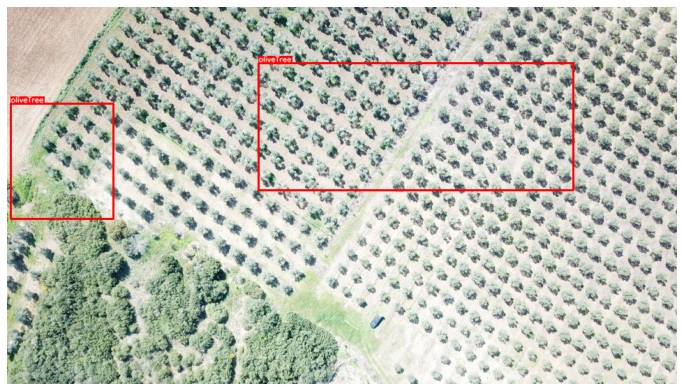

In [5]:
visualize(image, bboxes, category_ids, category_id_to_name)

In [6]:
# For more Transforms visit -> https://albumentations.ai/docs/api_reference/augmentations/transforms/
transform = A.Compose([
    A.RandomCrop(width=500, height=500),
    A.CLAHE(p=0.5),
    A.FancyPCA(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.GaussianBlur(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.RandomGamma(p=0.5),
    A.Superpixels(p=0.3),
    A.UnsharpMask(p=0.5),
    A.Sharpen(p=0.5),
    A.RingingOvershoot(p=0.5),
    A.RandomToneCurve(p=0.5),
    A.RandomShadow( p=0.5),
    A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.5)
], bbox_params=A.BboxParams(format='pascal_voc', min_area=1024, min_visibility=0.1, label_fields=['category_ids']))

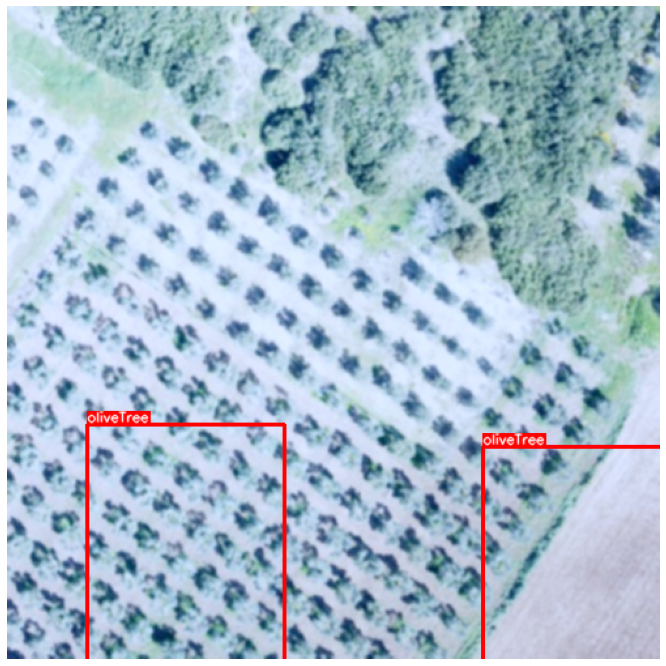

In [7]:
#random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

#MAIN

In [179]:
FILE_NAME = "im_(1)"
PATH = '/content/drive/MyDrive/MSc/'
BBOXES_SAVE_PATH = PATH + 'Bboxes/'+ FILE_NAME+'_bboxes.txt'
ANNOTS_PATH = PATH + "Annotations/"+ FILE_NAME+".xml"
IMG_PATH = PATH + "dataset/"+ FILE_NAME+".jpg"

In [180]:
image = cv2.imread(IMG_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [181]:
def GetBboxes(BBOXES_SAVE_PATH):
  bboxes = []
  with open(BBOXES_SAVE_PATH, 'r') as txt:
    for item in txt:
      data = item.replace(",", "").replace("[", "").replace("]", "").replace("\n", "").split(" ")
      data[0] = int(data[0])
      data[1] = int(data[1])
      data[2] = int(data[2])
      data[3] = int(data[3])
      bboxes.append(data)
    return bboxes

In [256]:
bboxes = GetBboxes(BBOXES_SAVE_PATH)
print(bboxes)
category_ids = len(bboxes) * [101]
# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {101: 'oT'}

[[47, 187, 72, 211], [62, 163, 86, 186], [83, 141, 103, 163], [95, 112, 122, 139], [111, 92, 134, 116], [124, 66, 149, 93], [141, 42, 166, 68], [160, 17, 182, 43], [173, 1, 200, 23], [217, 1, 234, 17], [202, 14, 222, 40], [222, 27, 244, 54], [233, 2, 259, 31], [261, 1, 276, 11], [279, 2, 298, 26], [321, 1, 342, 18], [299, 18, 320, 39], [279, 34, 305, 59], [260, 20, 279, 45], [359, 1, 375, 10], [377, 1, 397, 20], [420, 1, 443, 21], [402, 19, 424, 38], [425, 33, 442, 60], [412, 56, 431, 83], [387, 44, 408, 69], [342, 14, 360, 36], [361, 20, 384, 52], [322, 35, 346, 62], [54, 226, 78, 251], [82, 246, 96, 265], [92, 216, 111, 241], [69, 206, 92, 228], [84, 179, 106, 205], [110, 194, 131, 219], [134, 214, 150, 234], [141, 253, 163, 277], [165, 272, 186, 292], [185, 283, 209, 306], [207, 265, 225, 286], [185, 246, 201, 269], [163, 230, 179, 250], [106, 157, 124, 179], [125, 172, 143, 192], [151, 194, 167, 210], [173, 207, 192, 227], [195, 225, 216, 244], [221, 241, 241, 263], [245, 258, 263,

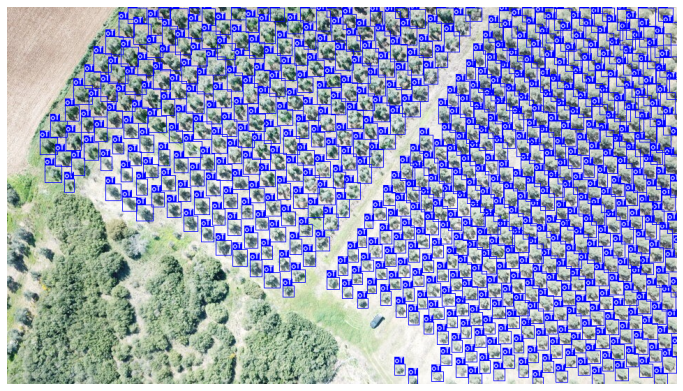

In [269]:
visualize(image, bboxes, category_ids, category_id_to_name)

In [285]:
# For more Transforms visit -> https://albumentations.ai/docs/api_reference/augmentations/transforms/
transform = A.Compose([
    A.RandomCrop(width=300, height=300),
    A.CLAHE(p=0.5),
    A.FancyPCA(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.GaussianBlur(p=0.5),
    #A.ShiftScaleRotate(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.RandomGamma(p=0.5),
    #A.Superpixels(p=0.3),
    A.UnsharpMask(p=0.5),
    A.Sharpen(p=0.5),
    A.RingingOvershoot(p=0.5),
    A.RandomToneCurve(p=0.5),
    A.RandomShadow( p=0.5),
    A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.5)
], bbox_params=A.BboxParams(format='pascal_voc', min_area=2, label_fields=['category_ids']))

58

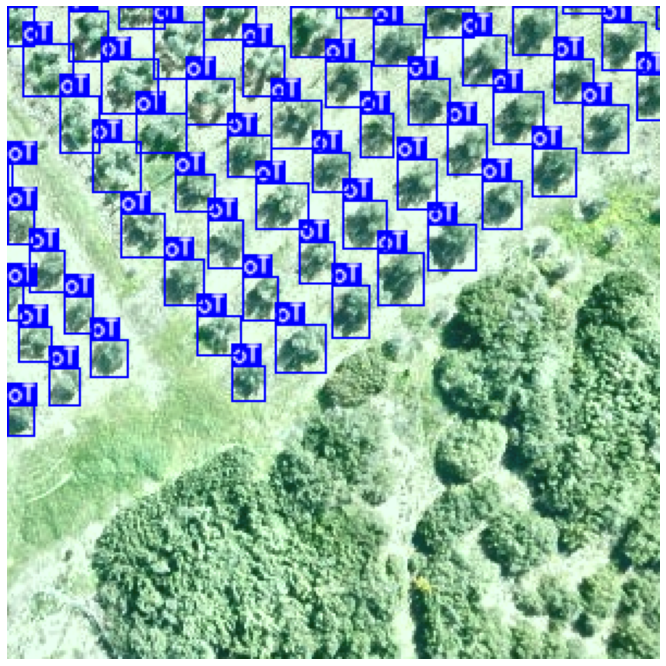

In [286]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
tfm_box = transformed['bboxes']
tfm_img = transformed['image']
visualize(
    tfm_img,
    tfm_box,
    transformed['category_ids'],
    category_id_to_name,
)
len(transformed['bboxes'])

# PASCAL VOC XML READER and WRITER


In [241]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [242]:
FILE_NAME = "im_(1)"
PATH = '/content/drive/MyDrive/MSc/'
BBOXES_SAVE_PATH = PATH + 'Bboxes/'+ FILE_NAME+'_bboxes.txt'
ANNOTS_PATH = PATH + "Annotations/"+ FILE_NAME+".xml"
IMG_PATH = PATH + "dataset/"+ FILE_NAME+".jpg"

In [243]:
import xmltodict
# https://mlhive.com/2022/02/read-and-write-pascal-voc-xml-annotations-in-python
with open(ANNOTS_PATH) as file:
    file_data = file.read() # read file contents
    
    # parse data using package
    dict_data = xmltodict.parse(file_data)

In [244]:
def GetPascalVocLabelCoords(dict_data):
  bboxes = []
  category_ids = []
  for item in dict_data['annotation']['object']:
    x_min = int(item['bndbox']['xmin'])
    y_min = int(item['bndbox']['ymin'])
    x_max = int(item['bndbox']['xmax'])
    y_max = int(item['bndbox']['ymax'])
    categoryName = item['name']
    bboxes.append([x_min, y_min, x_max, y_max])
    category_ids.append(categoryName)
  print(len(bboxes))
  print(category_ids)
  return bboxes, category_ids

In [245]:
bboxes, category_ids = GetPascalVocLabelCoords(dict_data)
with open(BBOXES_SAVE_PATH, 'w') as txt:
  for bbox in bboxes:
    txt.write(f"{bbox}\n")

#print(dict_data['annotation']['object'][0])

558
['oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveTree', 'oliveT